<a href="https://colab.research.google.com/github/pedrogasg/models-katas/blob/master/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.utils import plot_model

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
image_shape = x_train.shape
x_train = np.reshape(x_train,[-1, image_shape[1], image_shape[2], 1])
x_test = np.reshape(x_test,[-1, image_shape[1], image_shape[2], 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
input_shape = (image_shape[1], image_shape[2], 1)
batch_size = 32
kernel_size = 3
latent_dim = 2

In [0]:
layer_filters = [32, 64]

In [0]:
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

In [0]:
for filters in layer_filters:
  x = Conv2D(filters=filters,
             kernel_size=kernel_size,
             activation='relu',
             strides=2,
             padding='same')(x)

In [0]:
shape = x.shape.as_list()

In [0]:
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 6274      
Total params: 25,090
Trainable params: 25,090
Non-trainable params: 0
_________________________________________________________________


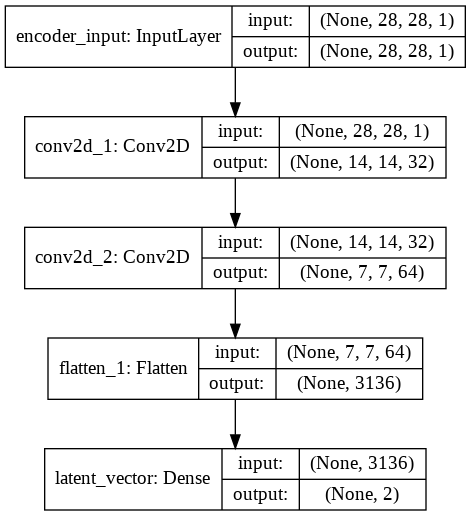

In [13]:
encoder = Model(inputs, latent, name='encoder')
encoder.summary()
plot_model(encoder, show_shapes=True)

In [0]:
latent_inputs = Input(shape=(latent_dim, ), name='decoder_input')
x = latent_inputs
x = Dense(shape[1] * shape[2] * shape[3])(x)
x = Reshape((shape[1], shape[2], shape[3]))(x)

In [0]:
for filters in layer_filters[::-1]:
  x = Conv2DTranspose(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu',
                      padding='same',
                      strides=2)(x)

In [0]:
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

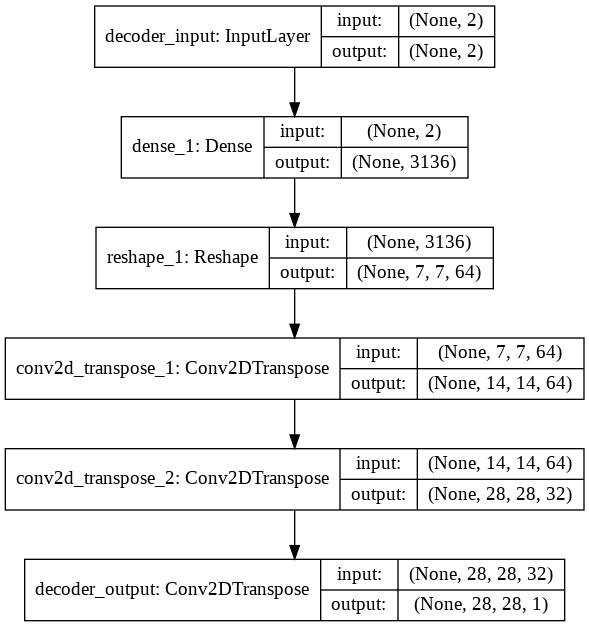

In [17]:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, show_shapes=True)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 2)                 25090     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         65089     
Total params: 90,179
Trainable params: 90,179
Non-trainable params: 0
_________________________________________________________________


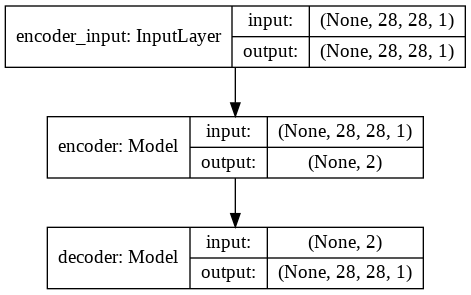

In [18]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()
plot_model(autoencoder, show_shapes=True) 

In [0]:
autoencoder.compile(loss='mse', optimizer='adam')

In [20]:
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=20,
                batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0541 - val_loss: 0.0481
Epoch 2/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0462 - val_loss: 0.0452
Epoch 3/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0445 - val_loss: 0.0443
Epoch 4/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0436 - val_loss: 0.0434
Epoch 5/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0431 - val_loss: 0.0429
Epoch 6/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0427 - val_loss: 0.0430
Epoch 7/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0423 - val_loss: 0.0424
Epoch 8/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0420 - val_loss: 0.0424
Epoch 9/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0418 - val_loss: 0.0

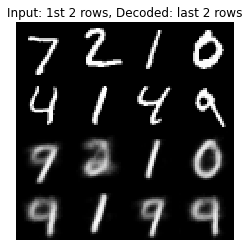

In [21]:
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_shape[1], image_shape[2]))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

In [0]:
xmin = ymin = -4
xmax = ymax = 4
z = encoder.predict(x_test, batch_size=batch_size)

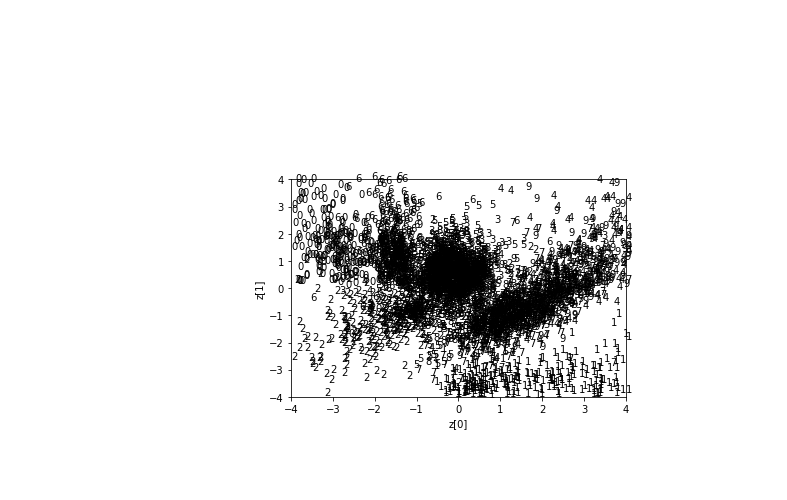

In [30]:
axes = plt.gca()
axes.set_xlim([xmin, xmax])
axes.set_ylim([ymin, ymax])

z = z[0::2]
plt.scatter(z[:, 0], z[:, 1], marker="")
for i, digit in enumerate(y_test[0::2]):
  axes.annotate(digit, (z[i, 0], z[i, 1]))
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

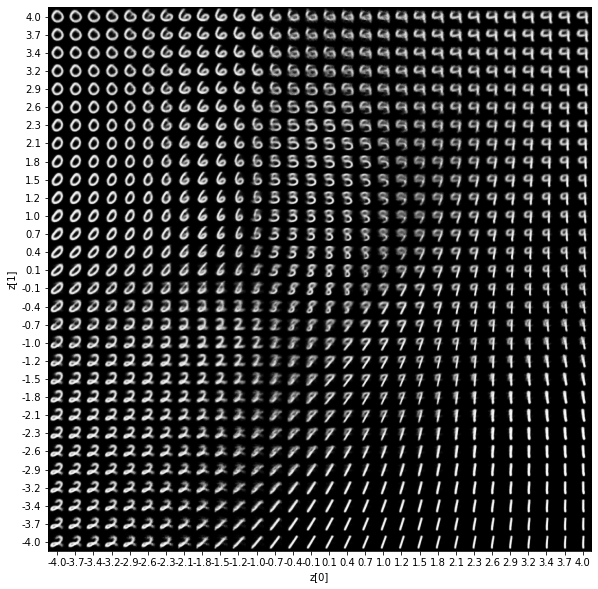

In [31]:
  n = 30
  digit_size = 28
  figure = np.zeros((digit_size * n, digit_size * n))
  # linearly spaced coordinates corresponding to the 2D plot
  # of digit classes in the latent space
  grid_x = np.linspace(xmin, xmax, n)
  grid_y = np.linspace(ymin, ymax, n)[::-1]

  for i, yi in enumerate(grid_y):
      for j, xi in enumerate(grid_x):
          z = np.array([[xi, yi]])
          x_decoded = decoder.predict(z)
          digit = x_decoded[0].reshape(digit_size, digit_size)
          figure[i * digit_size: (i + 1) * digit_size,
                  j * digit_size: (j + 1) * digit_size] = digit

  plt.figure(figsize=(10, 10))
  start_range = digit_size // 2
  end_range = n * digit_size + start_range + 1
  pixel_range = np.arange(start_range, end_range, digit_size)
  sample_range_x = np.round(grid_x, 1)
  sample_range_y = np.round(grid_y, 1)
  plt.xticks(pixel_range, sample_range_x)
  plt.yticks(pixel_range, sample_range_y)
  plt.xlabel("z[0]")
  plt.ylabel("z[1]")
  plt.imshow(figure, cmap='Greys_r')
  plt.show()